In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def draw_card():
    card = np.random.randint(1,14)
    card = min(10, card)
    return card

def initialize_state():
    players_card = []
    while sum(players_card) < 12:
        players_card.append(draw_card())
    dealers_card = [draw_card()]
    usable_ace = 1 if 1 in players_card else 0 
    return (players_card, dealers_card, usable_ace)

def update_value_function(v, returns):
    for i in range(10):
        for j in range(10):
            for k in range(2):
                v[i,j,k] = np.mean(returns[i,j,k])
    return v

def make_state(card_info):
    return (sum(card_info[0])-12, sum(card_info[1])-1, card_info[2])

def simulate_game(initial_state):
    current_state = initial_state
    states = [make_state(initial_state)]
    rewards = []
    current_state[0].append(draw_card())
    while sum(current_state[0]) < 20:
        states.append(make_state(current_state))
        rewards.append(0)
        current_state[0].append(draw_card())
    if sum(current_state[0]) > 21:
        rewards.append(-1)
        return states, rewards
    if sum(current_state[0]) == 21 and len(current_state[0]) == 2:
        current_state[1].append(draw_card())
        if sum(current_state[1]) == 21:
            rewards.append(0)
        else:
            rewards.append(1)
        return states, rewards
    while sum(current_state[1]) < 17:
        current_state[1].append(draw_card())
    if sum(current_state[1]) > 21:
        rewards.append(1)
    elif sum(current_state[1]) > sum(current_state[0]):
        rewards.append(-1)
    elif sum(current_state[1]) < sum(current_state[0]):
        rewards.append(1)
    else:
        rewards.append(0)
    return states, rewards
        
    
def update_returns(states, rewards, returns):
#     print(states)
    return_value = 0
    for r,s in zip(rewards[::-1], states[::-1]):
        return_value += r
        returns[s].append(return_value)
    return returns
        
def initialize_returns():
    returns = np.zeros((10,10,2), dtype='object')
    for i in range(10):
        for j in range(10):
            for k in range(2):
                returns[i,j,k] = []
    s = (0,0,0)
    return returns

def play_episode(v, returns):
    state = initialize_state()
    states, rewards = simulate_game(state)
    returns = update_returns(states, rewards, returns)
    v = update_value_function(v, returns)
    return v, returns

In [4]:
def mc_prediction(n_episodes):
    v = np.zeros((10,10,2))
    returns = initialize_returns()
    for i in range(n_episodes):
        v, returns = play_episode(v, returns)
    return v

In [10]:
v = mc_prediction(100000)

/home/janus/repos/rl-zoo/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/janus/repos/rl-zoo/venv/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


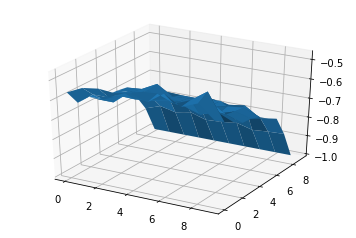

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(10), range(10))
ax.plot_surface(X, Y,v[:,:,0])